In [43]:
# https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-learn-scikit-learn-for-data-science/

# I thought this was a neat exploration with plotly

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
X,Y = make_classification(n_samples=200, n_classes=2, n_features=10, n_redundant=0, random_state=1)


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.2)

# instiantiate estimator
rf = RandomForestClassifier(max_features=5, n_estimators=100)
#rf = LogisticRegression()

rf.fit(X_train, Y_train)

preds = rf.predict(X_test)

# option 1
print(rf.score(X_test, Y_test))

# option 2
print(1 - abs((Y_test - preds)).sum() / len(Y_test))

0.85
0.85


In [50]:
from sklearn.model_selection import GridSearchCV

rng1 = np.arange(1,6,1)
rng2 = np.arange(10,210,10)
grid = dict(max_features=rng1, n_estimators=rng2)

# create estimator object
rf = RandomForestClassifier()

#grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
#rf = LogisticRegression()


# pass in estimator object, params and cv, and make the GridSearchCV object
cv = GridSearchCV(estimator=rf, param_grid=grid, cv=10)
# use object to fit data, will use params passed in and cv to do cv on the data and return results
cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [51]:
cv.best_params_

{'max_features': 1, 'n_estimators': 60}

In [52]:
cv.best_score_

0.90625

In [53]:
# rf
results = pd.concat([pd.DataFrame(cv.cv_results_["params"]),pd.DataFrame(cv.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

grouped = results.groupby(['max_features', 'n_estimators']).mean()

grouped = grouped.reset_index()

pivot = grouped.pivot('max_features', 'n_estimators')

In [54]:
results.sort_values(by='Accuracy', ascending=False)

,max_features,n_estimators,Accuracy
5,1,60,0.90625
35,2,160,0.89375
31,2,120,0.89375
39,2,200,0.88750
25,2,60,0.88750
...,...,...,...
21,2,20,0.83750
20,2,10,0.83750
3,1,40,0.81875
1,1,20,0.80625


In [58]:
pivot

Accuracy                                                        \
n_estimators      10       20       30       40       50       60       70    
max_features                                                                  
1             0.78750  0.80625  0.84375  0.81875  0.86875  0.90625  0.88125   
2             0.83750  0.83750  0.86875  0.87500  0.88125  0.88750  0.88125   
3             0.85000  0.86250  0.86875  0.87500  0.86250  0.87500  0.88125   
4             0.86875  0.85000  0.86875  0.86875  0.86250  0.86875  0.87500   
5             0.85625  0.85000  0.88125  0.86875  0.86875  0.87500  0.88125   

                                                                           \
n_estimators     80       90       100     110      120      130      140   
max_features                                                                
1             0.8750  0.86875  0.88125  0.8750  0.88125  0.88125  0.88125   
2             0.8625  0.88750  0.88125  0.8875  0.89375  0.88750  0.86250   
3             0.8750  0.86250  0.86875  0.8625  0.86875  0.87500  0.86875   
4             0.8750  0.87500  0.86875  0.8750  0.87500  0.86875  0.86875   
5             0.8750  0.87500  0.86250  0.8625  0.87500  0.87500  0.86875   

                                                                    
n_estimators      150      160      170      180      190      200  
max_features                                                        
1             0.87500  0.87500  0.86875  0.86250  0.86250  0.86875  
2             0.87500  0.89375  0.88125  0.87500  0.87500  0.88750  
3             0.88750  0.87500  0.86875  0.86875  0.88125  0.88125  
4             0.87500  0.86875  0.87500  0.86875  0.86875  0.87500  
5             0.86875  0.86875  0.87500  0.86875  0.87500  0.86250

In [55]:
import plotly
import plotly.graph_objects as go
# from plotly.offline import init_notebook_mode
# init_notebook_mode(connected = True)

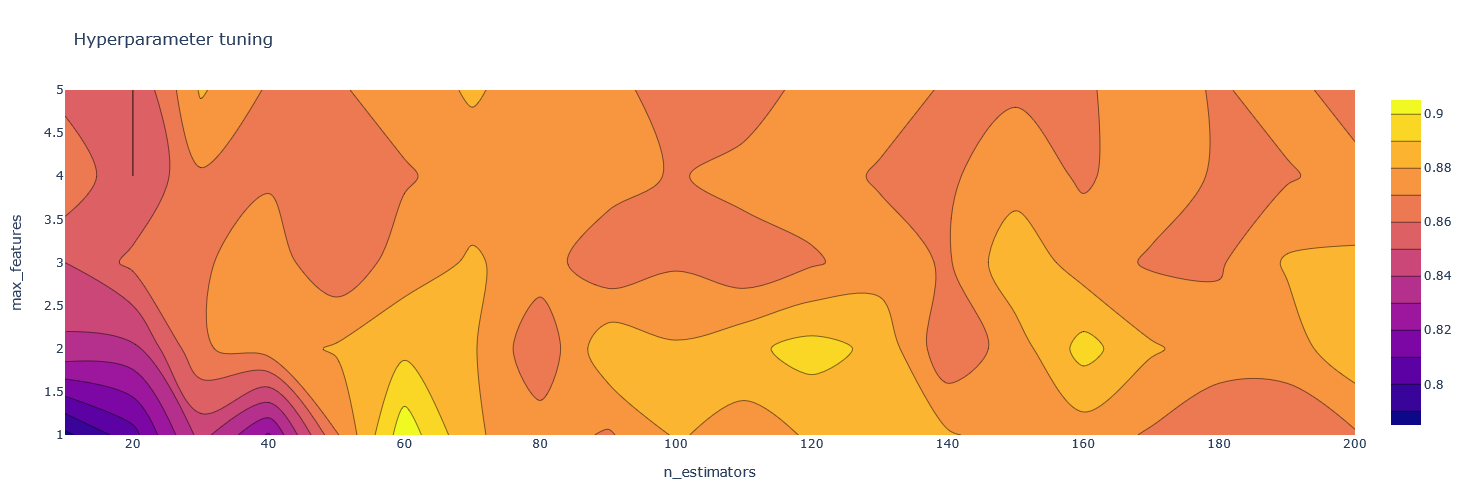

In [56]:
x = pivot.columns.levels[1].values # estimators
y = pivot.index.values             # max_features
z = pivot.values                   # accuracy

layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )
fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )
fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

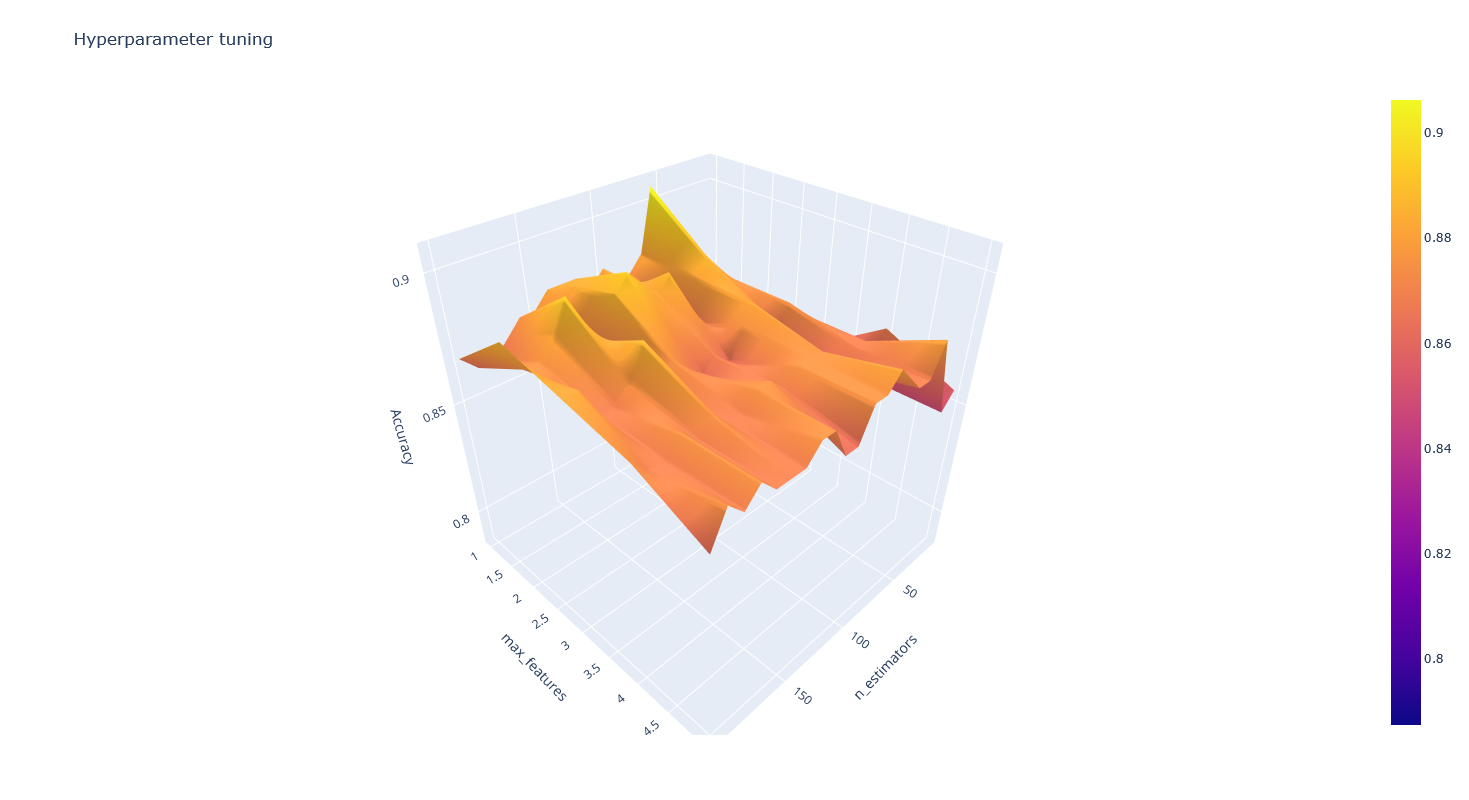

In [68]:
fig = go.Figure(data= [go.Surface(z=z, y=y, x=x)], layout=layout )
fig.update_layout(title='Hyperparameter tuning',
                  scene = dict(
                    xaxis_title='n_estimators',
                    yaxis_title='max_features',
                    zaxis_title='Accuracy'),
                  autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()